In [1]:
import numpy as np
import pandas as pd 

In [20]:
import os
path = os.path.join('data-payames', 'data-payames.csv')
df = pd.read_csv(path)
df.dropna(inplace=True)
df.head()

,Unnamed: 0,text,title,label
0,0,U.S. Secretary of State John F. Kerry said Mon...,Kerry to go to Paris in gesture of sympathy,1
1,1,It's primary day in New York and front-runners...,The Battle of New York: Why This Primary Matters,1
2,2,A Czech stockbroker who saved more than 650 Je...,‘Britain’s Schindler’ Dies at 106,1
3,3,Hillary Clinton and Donald Trump made some ina...,Fact check: Trump and Clinton at the 'commande...,1
4,4,Iranian negotiators reportedly have made a las...,Iran reportedly makes new push for uranium con...,1


In [3]:
import joblib
import sklearn
import matplotlib.pyplot as plt

In [41]:

model_path = os.path.join('joblib', '2021-04-29 14:23:41.895513 tfidf 1000 default svm.joblib')
model = joblib.load(model_path)
model

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=1000,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'arent', 'as',
                                             'at', 'be', 'because', 'been',
                                             'before', 'being', 'below',
                                             'between', 'both', 'but', 'by',
                                             'can', 'couldn', ...})),
                ('svc', SVC())])

In [42]:
def indiv_predict(model, article_dict):
    return model.predict([article_dict['text']])

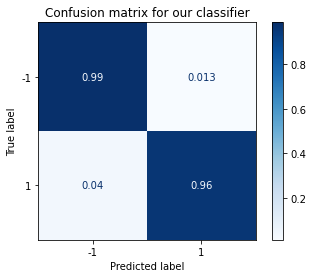

In [43]:
matrix = sklearn.metrics.plot_confusion_matrix(
    model, 
    df.text, df.label,
    cmap=plt.cm.Blues, normalize='true'
)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

Kaggle dataset now

In [44]:
path = 'kaggle-fn-dataset'
path_real = os.path.join(path, 'True.csv')
path_fake = os.path.join(path, 'Fake.csv')

realdf = pd.read_csv(path_real)
realdf['label'] = 1
fakedf = pd.read_csv(path_fake)
fakedf['label'] = -1
realdf.dropna(inplace=True)
fakedf.dropna(inplace=True)
realdf.columns, len(realdf), len(fakedf)

(Index(['title', 'text', 'subject', 'date', 'label'], dtype='object'),
 21417,
 23481)

In [45]:
kagdf = pd.concat([realdf, fakedf])
model.score(kagdf.text, kagdf.label)

0.8280769744754778

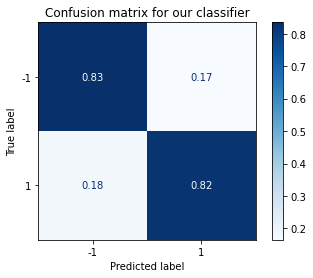

In [46]:
matrix = sklearn.metrics.plot_confusion_matrix(
    model, 
    kagdf.text, kagdf.label,
    cmap=plt.cm.Blues, normalize='true'
)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

george mcintire

In [47]:
path = os.path.join('data-george-mcintire', 'data-george-mcintire.csv')
gmdf = pd.read_csv(path)
gmdf.label.replace(['REAL', 'FAKE'], [1, -1], inplace=True)
gmdf.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâ€™s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",-1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,-1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â€” Kaydee King (@KaydeeKing) November 9, 2016...",-1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


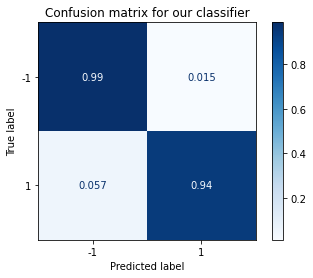

In [48]:
matrix = sklearn.metrics.plot_confusion_matrix(
    model, 
    gmdf.text, gmdf.label,
    cmap=plt.cm.Blues, normalize='true'
)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show() 

umich dataset

In [49]:
path = os.path.join('data-umich', 'fakeNewsDataset')
path_real = os.path.join(path, 'legit')
path_fake = os.path.join(path, 'fake')

file_list_real = sorted(list(os.walk(path_real))[0][2])
file_list_fake = sorted(list(os.walk(path_fake))[0][2])

def read_from_file(path):
    fin = open(path)
    headline = fin.readline()
    text = ' '.join(fin.readlines())
    fin.close()
    return headline, text

temp_list = []

for file in file_list_real:
    path = os.path.join(path_real, file)
    headline, text = read_from_file(path)
    temp_list.append([headline, text, 1])

um_realdf = pd.DataFrame(
    data=temp_list, 
    columns=['title', 'text', 'label']
)

temp_list = []
for file in file_list_fake:
    path = os.path.join(path_fake, file)
    headline, text = read_from_file(path)
    temp_list.append([headline, text, -1])

um_fakedf = pd.DataFrame(
    data=temp_list, 
    columns=['title', 'text', 'label']
)
    
umdf = pd.concat([um_realdf, um_fakedf])

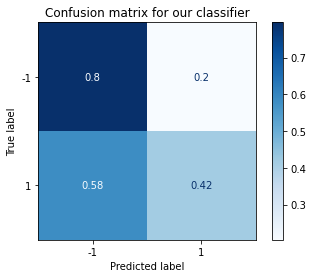

In [50]:
matrix = sklearn.metrics.plot_confusion_matrix(
    model, 
    umdf.text, umdf.label,
    cmap=plt.cm.Blues, normalize='true'
)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show() # fares badly on the umich dataset, probably because of the diverse range of domains